[View in Colaboratory](https://colab.research.google.com/github/Srishtisawla/Bigmart-Sales-Problem/blob/master/Big_Mart_Sales.ipynb)

In [0]:
#importing files
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection,preprocessing,feature_selection
from google.colab import files

In [0]:
train_path = 'Train.csv'
train_data = pd.read_csv(train_path)

In [0]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [0]:
#Train,validation data
X_train,X_validation,y_train,y_validation = model_selection.train_test_split(X,y,test_size=0.2,random_state=45)

In [218]:
print X_train.shape
print X_validation.shape
print y_train.shape
print y_validation.shape

(6818, 11)
(1705, 11)
(6818,)
(1705,)


In [219]:
#Checking missing values if any!
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 1984 to 7115
Data columns (total 11 columns):
Item_Identifier              6818 non-null object
Item_Weight                  5660 non-null float64
Item_Fat_Content             6818 non-null object
Item_Visibility              6818 non-null float64
Item_Type                    6818 non-null object
Item_MRP                     6818 non-null float64
Outlet_Identifier            6818 non-null object
Outlet_Establishment_Year    6818 non-null int64
Outlet_Size                  4854 non-null object
Outlet_Location_Type         6818 non-null object
Outlet_Type                  6818 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 639.2+ KB


In [0]:
#Imputing mean values
mean_values=X_train.groupby(['Item_Type'],as_index=False).mean()
Weight_values_imputed=mean_values[['Item_Type','Item_Weight']]

In [221]:
X_train1 = pd.merge(X_train,Weight_values_imputed,how='left',left_on=['Item_Type'],right_on=['Item_Type'])
X_train1['Item_Weight_x'][X_train1['Item_Weight_x'].isnull() ] = X_train1['Item_Weight_y']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
X_train = X_train1.drop('Item_Weight_y',axis=1)

In [0]:
X_train = X_train.rename(columns={'Item_Weight_x':'Item_Weight'})

In [224]:
X_train['Item_Visibility'][X_train['Item_Visibility']==0.00]=0.234260

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
X_train = X_train.drop('Outlet_Size',axis=1)
X_train = X_train.drop('Outlet_Identifier',axis=1)

In [226]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 0 to 6817
Data columns (total 9 columns):
Item_Identifier              6818 non-null object
Item_Weight                  6818 non-null float64
Item_Fat_Content             6818 non-null object
Item_Visibility              6818 non-null float64
Item_Type                    6818 non-null object
Item_MRP                     6818 non-null float64
Outlet_Establishment_Year    6818 non-null int64
Outlet_Location_Type         6818 non-null object
Outlet_Type                  6818 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 532.7+ KB


In [0]:
numeric_feature_columns = list(X_train._get_numeric_data().columns)
categorical_feature_columns = list(set(X_train.columns)-set(X_train._get_numeric_data().columns))
for column in numeric_feature_columns:
    if pd.unique(X_train[column]).shape[0] < np.sqrt(X_train.shape[0]):
        categorical_feature_columns.append(column)
        numeric_feature_columns.remove(column)

In [228]:
print "numeric_feature_columns :\n",numeric_feature_columns
print "categorical_feature_columns :\n",categorical_feature_columns

numeric_feature_columns :
['Item_Weight', 'Item_Visibility', 'Item_MRP']
categorical_feature_columns :
['Item_Type', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Identifier', 'Item_Fat_Content', 'Outlet_Establishment_Year']


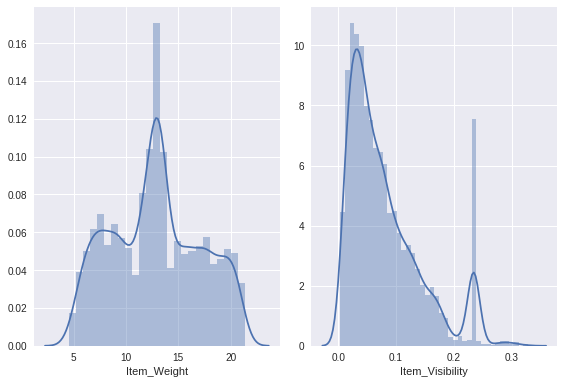

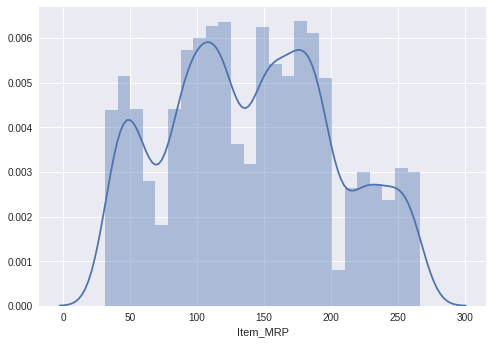

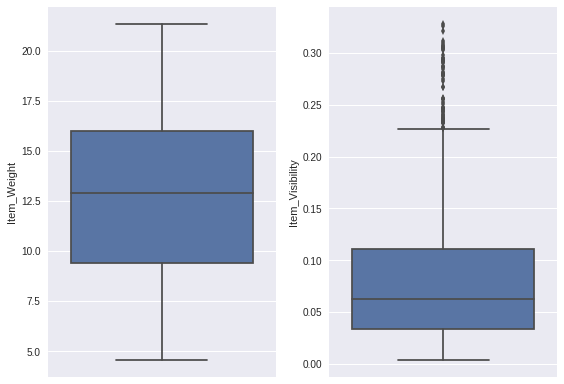

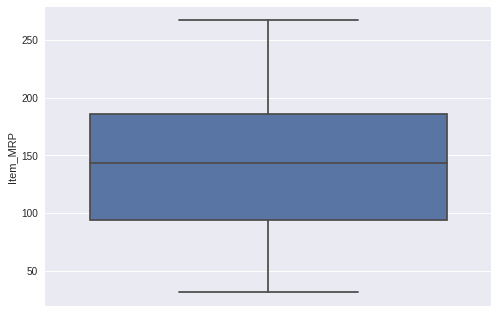

In [229]:
for i in range(0,len(numeric_feature_columns),2):
	if len(numeric_feature_columns)>i+1:
		plt.subplot(121)
		sns.distplot(X_train[numeric_feature_columns[i]], hist=True, kde=True)
		plt.subplot(122)
		sns.distplot(X_train[numeric_feature_columns[i+1]], hist=True, kde=True)
		plt.tight_layout()
	else:
		sns.distplot(X_train[numeric_feature_columns[i]], hist=True, kde=True)
	plt.show()
for i in range(0,len(numeric_feature_columns),2):
	if len(numeric_feature_columns)>i+1:
		plt.subplot(121)
		sns.boxplot(None, numeric_feature_columns[i],data = X_train)
		plt.subplot(122)
		sns.boxplot(None, numeric_feature_columns[i+1],data = X_train)
		plt.tight_layout()
	else:
		sns.boxplot(None, numeric_feature_columns[i],data = X_train)
	plt.show()

In [0]:
X_train['Item_Visibility']=np.sqrt(X_train['Item_Visibility'])

In [0]:
X_train['Item_MRP']= preprocessing.maxabs_scale(X_train['Item_MRP'][:,np.newaxis])
X_train['Item_Weight']= preprocessing.maxabs_scale(X_train['Item_Weight'][:,np.newaxis])

In [0]:
mean_weight = np.mean(X_train['Item_Weight'])
std_weight = np.std(X_train['Item_Weight'])
mean_mrp = np.mean(X_train['Item_MRP'])
std_mrp = np.std(X_train['Item_MRP'])

In [0]:
X_train['Item_Weight'] = (X_train['Item_Weight']-mean_weight)/(std_weight)
X_train['Item_MRP'] = (X_train['Item_MRP']-mean_mrp)/(std_mrp)

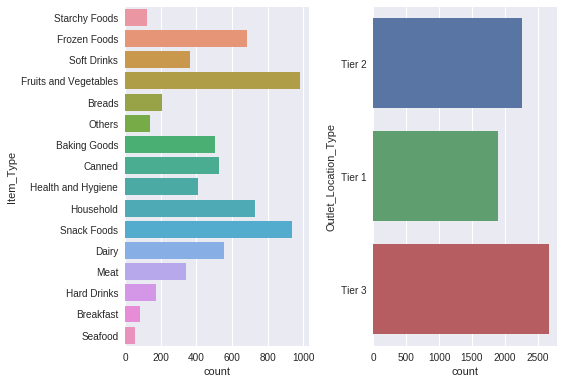

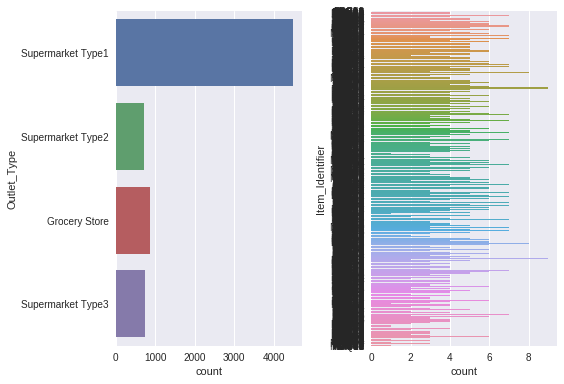

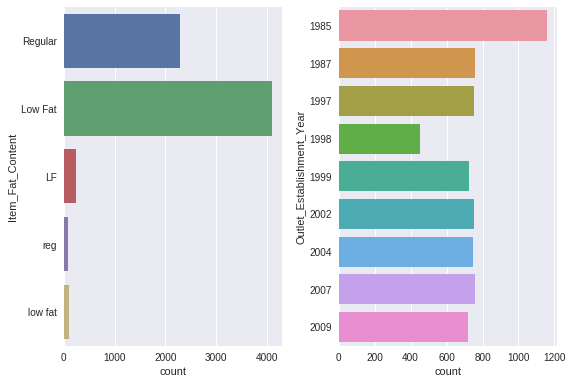

In [234]:
for i in range(0,len(categorical_feature_columns),2):
	if len(categorical_feature_columns)>i+1:
		plt.subplot(121)
		sns.countplot(y=categorical_feature_columns[i], data=X_train)
		plt.subplot(122)
		sns.countplot(y=categorical_feature_columns[i+1], data=X_train)
		plt.tight_layout()
	else:
		sns.countplot(y=categorical_feature_columns[i], data=X_train)
	plt.show()

In [235]:
X_train['Item_Fat_Content'][X_train['Item_Fat_Content']=='LF']='low fat'
X_train['Item_Fat_Content'][X_train['Item_Fat_Content']=='reg']='Regular'

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
categorical_feature_columns = list(set(categorical_feature_columns)-set('Item_Identifier'))
encoder = preprocessing.LabelEncoder()
for val in categorical_feature_columns:
    X_train[val] = encoder.fit_transform(X_train[val])

In [237]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 0 to 6817
Data columns (total 9 columns):
Item_Identifier              6818 non-null int64
Item_Weight                  6818 non-null float64
Item_Fat_Content             6818 non-null int64
Item_Visibility              6818 non-null float64
Item_Type                    6818 non-null int64
Item_MRP                     6818 non-null float64
Outlet_Establishment_Year    6818 non-null int64
Outlet_Location_Type         6818 non-null int64
Outlet_Type                  6818 non-null int64
dtypes: float64(3), int64(6)
memory usage: 852.7 KB


In [238]:
poly = preprocessing.PolynomialFeatures(3)
poly.fit(X_train)
fitted_X = poly.transform(X_train)
las = linear_model.Lasso(alpha=0.0001)
las.fit(fitted_X,y_train)
y_predicted = las.predict(fitted_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_predicted)

1112578.8307752355

In [239]:
poly = preprocessing.PolynomialFeatures(3)
poly.fit(X_train)
fitted_X = poly.transform(X_train)
las = linear_model.Lasso(alpha=0.001)
las.fit(fitted_X,y_train)
y_predicted = las.predict(fitted_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_predicted)

1112575.1914807458

In [240]:
poly = preprocessing.PolynomialFeatures(3)
poly.fit(X_train)
fitted_X = poly.transform(X_train)
las = linear_model.Lasso(alpha=0.01)
las.fit(fitted_X,y_train)
y_predicted = las.predict(fitted_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_predicted)

1112592.6285711268

In [241]:
poly = preprocessing.PolynomialFeatures(5)
poly.fit(X_train)
fitted_X = poly.transform(X_train)
las = linear_model.Lasso(alpha=0.01)
las.fit(fitted_X,y_train)
y_predicted = las.predict(fitted_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_predicted)

966217.9279336958

In [242]:
poly = preprocessing.PolynomialFeatures(5)
poly.fit(X_train)
fitted_X = poly.transform(X_train)
las = linear_model.Lasso(alpha=0.1)
las.fit(fitted_X,y_train)
y_predicted = las.predict(fitted_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_predicted)

970000.3720567536

In [243]:
#scaling weight & Mrp
poly = preprocessing.PolynomialFeatures(5)
poly.fit(X_train)
fitted_X = poly.transform(X_train)
las = linear_model.Lasso(alpha=0.01)
las.fit(fitted_X,y_train)
y_predicted = las.predict(fitted_X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_predicted)

966217.9279336958

In [244]:
#Correcting Visibility
poly = preprocessing.PolynomialFeatures(5)
poly.fit(X_train)
fitted_X = poly.transform(X_train)
las = linear_model.Lasso(alpha=0.01)
las.fit(fitted_X,y_train)
y_predicted = las.predict(fitted_X)
from sklearn.metrics import mean_squared_error,r2_score
print np.sqrt(mean_squared_error(y_train,y_predicted))
print r2_score(y_train,y_predicted)

982.9638487420053
0.6650592965364134


In [245]:
#When using validation data
X_validation1 = pd.merge(X_validation,Weight_values_imputed,how='left',left_on=['Item_Type'],right_on=['Item_Type'])
X_validation1['Item_Weight_x'][X_validation1['Item_Weight_x'].isnull() ] = X_validation1['Item_Weight_y']
X_validation = X_validation1.drop('Item_Weight_y',axis=1)
X_validation = X_validation.rename(columns={'Item_Weight_x':'Item_Weight'})
X_validation['Item_Visibility'][X_validation['Item_Visibility']==0.00]=0.234260
X_validation = X_validation.drop('Outlet_Size',axis=1)
X_validation = X_validation.drop('Outlet_Identifier',axis=1)
X_validation['Item_Visibility']=np.sqrt(X_validation['Item_Visibility'])
X_validation['Item_MRP']= preprocessing.maxabs_scale(X_validation['Item_MRP'][:,np.newaxis])
X_validation['Item_Weight']= preprocessing.maxabs_scale(X_validation['Item_Weight'][:,np.newaxis])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [246]:
X_validation['Item_Weight'] = (X_validation['Item_Weight']-mean_weight)/(std_weight)
X_validation['Item_MRP'] = (X_validation['Item_MRP']-mean_mrp)/(std_mrp)
X_validation['Item_Fat_Content'][X_validation['Item_Fat_Content']=='LF']='low fat'
X_validation['Item_Fat_Content'][X_validation['Item_Fat_Content']=='reg']='Regular'

for val in categorical_feature_columns:
    X_validation[val] = encoder.fit_transform(X_validation[val])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [247]:

fitted_X = poly.transform(X_validation)
y_predicted = las.predict(fitted_X)
from sklearn.metrics import mean_squared_error,r2_score
print np.sqrt(mean_squared_error(y_validation,y_predicted))
print r2_score(y_validation,y_predicted)

1208.7900205372907
0.5155661552237958


In [252]:
#checking on test data
path = 'Test.csv'
test_data = pd.read_csv(path)
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [253]:
test_data1 = pd.merge(test_data,Weight_values_imputed,how='left',left_on=['Item_Type'],right_on=['Item_Type'])
test_data1['Item_Weight_x'][test_data1['Item_Weight_x'].isnull() ] = test_data1['Item_Weight_y']
test_data = test_data1.drop('Item_Weight_y',axis=1)
test_data = test_data.rename(columns={'Item_Weight_x':'Item_Weight'})
test_data['Item_Visibility'][test_data['Item_Visibility']==0.00]=0.234260
test_data = test_data.drop('Outlet_Size',axis=1)
test_data = test_data.drop('Outlet_Identifier',axis=1)
test_data['Item_Visibility']=np.sqrt(test_data['Item_Visibility'])
test_data['Item_MRP']= preprocessing.maxabs_scale(test_data['Item_MRP'][:,np.newaxis])
test_data['Item_Weight']= preprocessing.maxabs_scale(test_data['Item_Weight'][:,np.newaxis])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [254]:
test_data['Item_Weight'] = (test_data['Item_Weight']-mean_weight)/(std_weight)
test_data['Item_MRP'] = (test_data['Item_MRP']-mean_mrp)/(std_mrp)
test_data['Item_Fat_Content'][test_data['Item_Fat_Content']=='LF']='low fat'
test_data['Item_Fat_Content'][test_data['Item_Fat_Content']=='reg']='Regular'

for val in categorical_feature_columns:
    test_data[val] = encoder.fit_transform(test_data[val])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
fitted_X = poly.transform(test_data)
y_predicted = las.predict(fitted_X)

In [0]:
y_pred = pd.DataFrame(y_predicted)
y_pred.to_csv("Prediction.csv")

In [0]:
files.download("Prediction.csv")